# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

# training_file = './traffic-signs-data/train.p'

# Distributions in the training set are skewed with large outliers, so I applied some
# jittering (similar to Sermanet & LeCun) to "fill in" some of the gaps and augment
# the dataset as a whole.
# 
# See jitter_training_data.py for the functions and script - it takes a long time
# to manipulate 20,000+ images so I pickled the jittered training data after
# generating it.
jittered_file = './traffic-signs-data/jittered.p'

# Validation and Test sets loaded as normal
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

# with open(training_file, mode='rb') as f:
#     train = pickle.load(f)
with open(jittered_file, mode='rb') as f:
    jit = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Pull data and labels from pickled containers
# X_train, y_train = train['features'], train['labels']
X_train, y_train = jit['features'], jit['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

# Double-check data imports
assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of a traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 101936
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

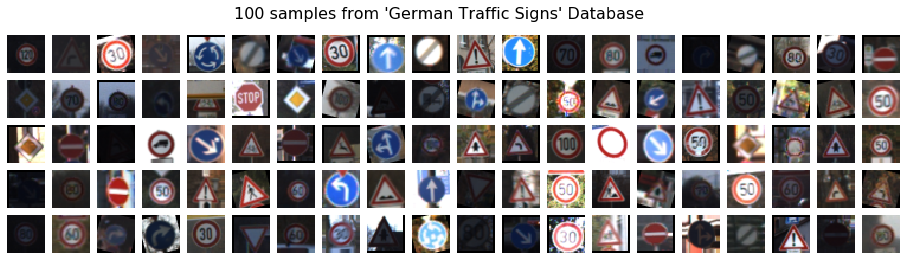

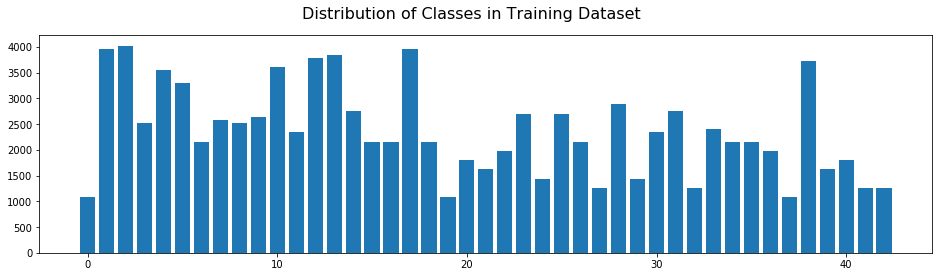

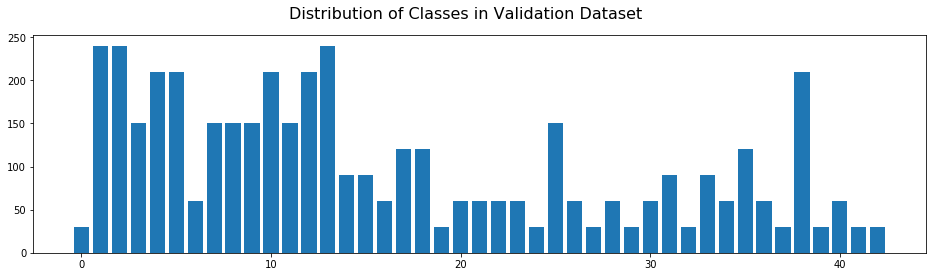

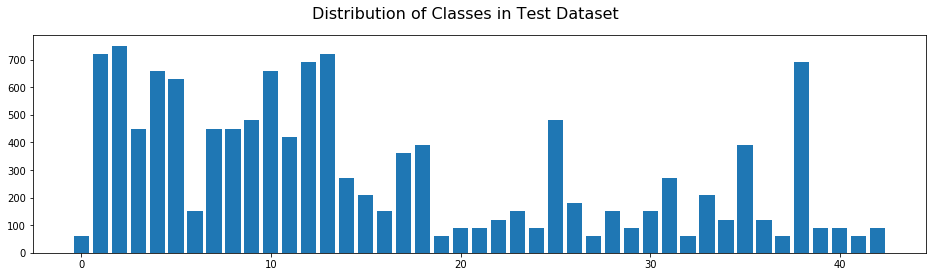

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Visualizations will be shown in the notebook.
%matplotlib inline

# Obviously, we can't visualize 30,000+ images easily. Just shuffle then take a random sample
X_train, y_train = shuffle(X_train, y_train)

# Take the first 100 images to plot a sampler
X_disp = X_train[:100]
y_disp = y_train[:100]

figure1 = plt.figure(figsize=(16, 4))
figure1.suptitle("100 samples from 'German Traffic Signs' Database", fontsize=16)
for i in range(len(X_disp)):
    figure1.add_subplot(5, 20, i+1)
    plt.imshow(X_disp[i])
    plt.axis('off')
plt.show()


# Calculate and plot distributions (occurences) for training, validation and test sets
def countOccurrences(labels): 
    uniques = list(set(labels))             # Get unique labels contained in input
    counts = []                             # Output container
    
    for lbl in uniques:
        # Add 1 to count for each occurence of a unique label
        counts.append(sum(1 for y in labels if y == lbl))
    
    return uniques, counts


# Plot distributions for training, validation and test sets
train_labels, train_counts = countOccurrences(y_train)
figure2 = plt.figure(figsize=(16, 4))
figure2.suptitle("Distribution of Classes in Training Dataset", fontsize=16)
plt.bar(train_labels, train_counts)
plt.show()

valid_labels, valid_counts = countOccurrences(y_valid)
figure3 = plt.figure(figsize=(16, 4))
figure3.suptitle("Distribution of Classes in Validation Dataset", fontsize=16)
plt.bar(valid_labels, valid_counts)
plt.show()

test_labels, test_counts = countOccurrences(y_test)
figure4 = plt.figure(figsize=(16, 4))
figure4.suptitle("Distribution of Classes in Test Dataset", fontsize=16)
plt.bar(test_labels, test_counts)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# Greyscale images
# This step NOT used in final pipeline, I was never able to achieve > 90% accuracy
# after greyscaling, although it did allow the network to be much smaller.
# The lines of code are left since they could be handy later, but commented out.
# 
# X_train = (X_train[:,:,:,0:1] + X_train[:,:,:,1:2] + X_train[:,:,:,2:3]) // 3
# X_valid = (X_valid[:,:,:,0:1] + X_valid[:,:,:,1:2] + X_valid[:,:,:,2:3]) // 3
# X_test = (X_test[:,:,:,0:1] + X_test[:,:,:,1:2] + X_test[:,:,:,2:3]) // 3
# 
# Update image shape
# image_shape = X_train[0].shape
# print("Updated image shape after greyscale:", image_shape)

# Normalization
X_train = X_train/128 - 1
X_valid = X_valid/128 - 1
X_test = X_test/128 - 1

### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf


# Network parameters
MU = 0                          # Arguments for tf.truncated_normal, mean of truncated distribution
SIGMA = 0.05                    # Arguments for tf.truncated_normal, stddev of truncated distribution
IMG_CHANNELS = image_shape[2]   # RGB images, so C == 3

CONV1_F_SIZE = 5                # Filter width and height for 1st 5x5 convolution layer
CONV1_N_OUT = 48                # No. of filters (output depth) for 1st 5x5 convolution layer
POOL1_SIZE = 2                  # Resolution for 1st Maxpool

CONV2A_F_SIZE = 1               # Filter width and height for 1x1 convolution layer
CONV2A_N_OUT = 24               # No. of filters (output depth) for 1x1 convolution layer
POOL2A_SIZE = 2                 # Resolution for Maxpool of 1x1 convolution layer

CONV2B_F_SIZE = 5               # Filter width and height for 2nd 5x5 convolution layer
CONV2B_N_OUT = 48               # No. of filters (output depth) for 2nd 5x5 convolution layer
POOL2B_SIZE = 2                 # Resolution for Maxpool of 5x5 convolution layer

FC1_N_OUT = 200                 # Output width for 1st fully connected layer
FC2_N_OUT = 100                 # Output width for 2nd fully connected layer


# Calculated parameters
# Unsure how maxpool behaves if it sees "leftovers". For now, since pooling ksize == stride == 2,
# just make sure the convolution outputs have even-numbered width and height.
POOL1_WD = (32 - (CONV1_F_SIZE-1)) // POOL1_SIZE                # == 14
POOL2A_WD = (POOL1_WD - (CONV2A_F_SIZE-1)) // POOL2A_SIZE       # == 7
POOL2B_WD = (POOL1_WD - (CONV2B_F_SIZE-1)) // POOL2B_SIZE       # == 5


# Modified LeNet CNN. Accepts a 32x32xC image as input
# Parameters are controlled above
def LeNet(x, keep_prob, mu=MU, sigma=SIGMA, c=IMG_CHANNELS,
          conv1size=CONV1_F_SIZE, conv1out=CONV1_N_OUT, pool1size=POOL1_SIZE,
          conv2asize=CONV2A_F_SIZE, conv2aout=CONV2A_N_OUT, pool2asize=POOL2A_SIZE,
          conv2bsize=CONV2B_F_SIZE, conv2bout=CONV2B_N_OUT, pool2bsize=POOL2B_SIZE,
          pool2a_wd=POOL2A_WD, pool2b_wd=POOL2B_WD,
          fc1out=FC1_N_OUT, fc2out=FC2_N_OUT, output_n=n_classes):

    # Set up dimensions of weights and biases first

    # == 7x7x24 + 5x5x48, input width for the 1st fully connected layer
    fc1_width = pool2a_wd * pool2a_wd * conv2aout + pool2b_wd * pool2b_wd * conv2bout

    weights = {
        'wc1': tf.Variable(tf.truncated_normal([conv1size, conv1size, c, conv1out], mean=mu, stddev=sigma)),
        'wc2a': tf.Variable(tf.truncated_normal([conv2asize, conv2asize, conv1out, conv2aout],
                                                mean=mu, stddev=sigma)),
        'wc2b': tf.Variable(tf.truncated_normal([conv2bsize, conv2bsize, conv2aout, conv2bout],
                                                 mean=mu, stddev=sigma)),
        'wd1': tf.Variable(tf.truncated_normal([fc1_width, fc1out], mean=mu, stddev=sigma)),
        'wd2': tf.Variable(tf.truncated_normal([fc1out, fc2out], mean=mu, stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([fc2out, output_n], mean=mu, stddev=sigma))}

    biases = {
        'bc1': tf.Variable(tf.truncated_normal([conv1out], mean=mu, stddev=sigma)),
        'bc2a': tf.Variable(tf.truncated_normal([conv2aout], mean=mu, stddev=sigma)),
        'bc2b': tf.Variable(tf.truncated_normal([conv2bout], mean=mu, stddev=sigma)),
        'bd1': tf.Variable(tf.truncated_normal([fc1out], mean=mu, stddev=sigma)),
        'bd2': tf.Variable(tf.truncated_normal([fc2out], mean=mu, stddev=sigma)),
        'out': tf.Variable(tf.truncated_normal([output_n], mean=mu, stddev=sigma))}

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x48. ReLu activation
    c1 = tf.nn.conv2d(x, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID') + biases['bc1']
    conv1 = tf.nn.relu(c1)
    # Pooling. Input = 28x28x48. Output = 14x14x48.
    pool1 = tf.nn.max_pool(conv1, ksize=[1, pool1size, pool1size, 1], strides=[1, pool1size, pool1size, 1],
                           padding='VALID')

    # Layer 2: Inception model. Conv 1x1 -> poolx2, Conv 1x1 -> 5x5 -> poolx2, and Conv 1x1 -> 3x3 -> poolx2
    # will all be fed to the first fully connected layer.

    # Layer 2a: Convolutional 1x1 -> poolx2. Input = 14x14x48. Output = 14x14x24. ReLu activation
    c2a = tf.nn.conv2d(pool1, weights['wc2a'], strides=[1, 1, 1, 1], padding='VALID') + biases['bc2a']
    conv2a = tf.nn.relu(c2a)
    # Pooling. Input = 14x14x24. Output = 7x7x24.
    pool2a = tf.nn.max_pool(conv2a, ksize=[1, pool2asize, pool2asize, 1], strides=[1, pool2asize, pool2asize, 1],
                            padding='VALID')

    # Layer 2b: Convolutional 1x1 -> 5x5 -> poolx2. Input = 14x14x24. Output = 10x10x48. ReLu activation
    c2b1 = tf.nn.conv2d(conv2a, weights['wc2b'], strides=[1, 1, 1, 1], padding='VALID') + biases['bc2b']
    conv2b = tf.nn.relu(c2b1)
    # Pooling. Input = 10x10x48. Output = 5x5x48.
    pool2b = tf.nn.max_pool(conv2b, ksize=[1, pool2bsize, pool2bsize, 1], strides=[1, pool2bsize, pool2bsize, 1],
                             padding='VALID')

    # Layer 3: Fully Connected. Input = 7x7x24 + 5x5x48. Output = 200. ReLu activation
    # Dropout implemented here reduces validation error significantly
    pool2a_flat = tf.layers.flatten(pool2a)
    pool2b_flat = tf.layers.flatten(pool2b)
    conv_pools_flat = tf.concat((pool2a_flat, pool2b_flat), axis=-1)
    fc1 = tf.add(tf.matmul(conv_pools_flat, weights['wd1']), biases['bd1'])
    conn1 = tf.nn.relu(fc1)
    conn1 = tf.nn.dropout(conn1, keep_prob)

    # Layer 4: Fully Connected. Input = 200. Output = 100. ReLu activation
    # Dropout implemented here reduces validation error significantly
    fc2 = tf.add(tf.matmul(conn1, weights['wd2']), biases['bd2'])
    conn2 = tf.nn.relu(fc2)
    conn2 = tf.nn.dropout(conn2, keep_prob)

    # Layer 5: Fully Connected. Input = 100. Output = 43. Linear Combination
    logits = tf.add(tf.matmul(conn2, weights['out']), biases['out'])

    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Training settings
EPOCHS = 20
BATCH_SIZE = 100
LEARN_RATE = 0.001
FC_KEEP_RATE = 0.5              # Keep rate for dropout

# Parameter sweep
# "params" was used with a for-loop to test out many different combinations of parameters overnight.
# The for-loop has been removed, but "params" is still helpful for organizing and saving results.
# 
# Changing convolution size away from 5x5 does not seem to make a positive effect,
# nor does changing the Maxpool size away from 2,
# but fine-tuning using filter depths in the convolution layers, and 
# the widths of the fully-connected layers seems to be effective.
# CONV1_N_OUT = 48                # No. of filters (output depth) for 1st 5x5 convolution layer
# CONV2A_N_OUT = 24               # No. of filters (output depth) for 1x1 convolution layer
# CONV2B_N_OUT = 48               # No. of filters (output depth) for 2nd 5x5 convolution layer
# FC1_N_OUT = 200                 # Output width for 1st fully connected layer
# FC2_N_OUT = 100                 # Output width for 2nd fully connected layer
params = [48, 24, 48, 200, 100]

# for run_config in params:
# Input/Label placeholders
x = tf.placeholder(tf.float32, (None, image_shape[0], image_shape[1], image_shape[2]))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32)

# Define loss optimizer
logits = LeNet(x, keep_prob,
               conv1out=params[0], conv2aout=params[1], conv2bout=params[2], fc1out=params[3], fc2out=params[4])
print("Confirmation: Training run with settings:", params[0], params[1], params[2], params[3], params[4])

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARN_RATE)
training_operation = optimizer.minimize(loss_operation)

# Evaluation after training
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

outputfname = './traffic-signs-data/' + \
              str(params[0]) + '-' + str(params[1]) + '-' + str(params[2]) + '-' + \
              str(params[3]) + '-' + str(params[4]) + '.txt'
with open(outputfname, 'w') as file:  # Use file to refer to the file object
    file.write(outputfname)
    file.write('\r\n')

# Helper to save parameters after training
saver = tf.train.Saver()


def evaluate(X_data, y_data, dropout=1.0, batch_size=BATCH_SIZE):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset : offset+batch_size], y_data[offset : offset+batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: dropout})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


# Start Tensorflow session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)

    # print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_train[offset : offset+BATCH_SIZE], y_train[offset : offset+BATCH_SIZE]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: FC_KEEP_RATE})

        test_accuracy = evaluate(X_train, y_train, 1.0)
        validation_accuracy = evaluate(X_valid, y_valid, 1.0)
        print("EPOCH {} ...".format(i + 1))
        print("Training Accuracy = {:.3f}".format(test_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()

        # Write results to file one epoch at a time
        with open(outputfname, 'a') as file:
            file.write("EPOCH {} ...".format(i + 1))
            file.write('\r\n')
            file.write("Training Accuracy = {:.3f}".format(test_accuracy))
            file.write('\r\n')
            file.write("Validation Accuracy = {:.3f}".format(validation_accuracy))
            file.write('\r\n')

    saver.save(sess, './lenet')
    print("Model saved")


# Evaluation on Test data
# Only do this at the end once things have been trained!
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

    # Write results to file one epoch at a time
    with open(outputfname, 'a') as file:
        file.write('Model saved\r\n')
        file.write("Test Accuracy = {:.3f}".format(test_accuracy))
        file.write('\r\n')

Confirmation: Training run with settings: 48 24 48 200 100

EPOCH 1 ...
Training Accuracy = 0.911
Validation Accuracy = 0.890

EPOCH 2 ...
Training Accuracy = 0.965
Validation Accuracy = 0.941

EPOCH 3 ...
Training Accuracy = 0.983
Validation Accuracy = 0.958

EPOCH 4 ...
Training Accuracy = 0.989
Validation Accuracy = 0.971

EPOCH 5 ...
Training Accuracy = 0.988
Validation Accuracy = 0.950

EPOCH 6 ...
Training Accuracy = 0.994
Validation Accuracy = 0.967



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")